# Quiz 2: python essentials and data analysis

#### Date: 20 September 2024

#### Credits: 20 points

- When you finish, please send a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- This classwork is **individual**. Please include your name in the notebook.


- Copying and pasting code from **AI applications is a breach of academic integrity**. Code should be your own!


- Within a **single python notebook**, solve the following problems:

## Name: Alan Israel Palma Travez

### Problem 1 (Fermi-Dirac distribution, 10 points):

The **Fermi-Dirac distribution** describes the probability that a quantum state with energy $E$ is occupied by a fermion (e.g. by an electron) at thermal equilibrium. The Fermi-Dirac distribution is:

$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$

Where:

- $f(E)$ is the probability that a state with energy $E$ is occupied.

- $E$ is the energy of the state.

- $E_{\rm F}$ is the chemical potential (also called the Fermi level at $T=0\,\rm K$).

- $k_B$ is the Boltzmann constant.

- $T$ is the absolute temperature.

The exponential term $e^{(E - E_{\rm F})/k_B T}$ controls how the occupancy changes with energy and temperature.

### Tasks:

(a) Create a python lambda function to convert the Boltzmann constant from SI units ($\rm J/K$) to units of $\rm eV/K$ (**Hint:** using the fundamental constants from scipy may be helpful).

(b) Create a python function that reads in the Fermi level, the absolute temperature, and the energy of the state, and then returns the (Fermi-Dirac) probability distribution function, $f(E)$. The Boltzmann constant should be in units of $\rm eV/K$.

(c) Define a python dictionary containing the symbols of the $5$ following materials as "keys" with their respective Fermi levels ($E_{\rm F}$) as elements.

- Silicon ($\rm Si$) has $E_{\rm F}=1.1\,\rm eV$

- Gallium Arsenide ($\rm Ga\,As$) has $E_{\rm F}=1.4\,\rm eV$

- Gold ($\rm Au$) has $E_{\rm F}=5.5\,\rm eV$

- Copper ($\rm Cu$) has $E_{\rm F}=7\,\rm eV$

- Aluminum ($\rm Al$) has $E_{\rm F}=11.6\,\rm eV$



(d) Generate a 1D energy vector covering a reasonable range of energies in $\rm eV$, and fix the temperature of the gas at $100\,\rm K$.

(e) Using the values of Fermi levels ($E_{\rm F}$) from the dictionary in point (c), and the fixed energy vector and temperature defined in point (d), call the function created in point (b) to obtain a set of arrays with the Fermi-Dirac distributions, $f(E)$, for each material. (**Hint:** a for loop can help access the dictionary elements).

(f) Use matplotlib to make a single high-quality labeled plot of the energy distribution of all 5 materials for the set temperature. The plot should have $f(E)$ on the Y axis and $E$ on the X axis.

(g) Repeat steps (d,e,f) for 3 more temperatures ($0\,\rm K$, $400\,\rm K$, and $1000\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. Each panel should show the results for each temperature ($0\,\rm K$, $100\,\rm K$, $400\,\rm K$, and $1000\,\rm K$).


### Analysis:

Based on your plots, answer the following questions:

(h) What happens with the energy distributions at low temperatures? Particularly, at $0\,\rm K$?

(i) What happens with the fermion distributions in the materials when we increase the temperature? Why?

(j) Can we classify the materials in groups using their $f(E)$ distributions at a fixed temperature? Why do some materials have higher $E_{\rm F}$ than others?

In [109]:
#Third party functions

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd

(a) Create a python lambda function to convert the Boltzmann constant from SI units ($\rm J/K$) to units of $\rm eV/K$ (**Hint:** using the fundamental constants from scipy may be helpful).

In [110]:
#defining lamda fuction 

k_b = sc.constants.Boltzmann  #Units [J/K]

conver_units = lambda a: a*6.242e+18

k_b_new = conver_units(k_b) #Units [eV/K]

#print(k_b_new)

(b) Create a python function that reads in the Fermi level, the absolute temperature, and the energy of the state, and then returns the (Fermi-Dirac) probability distribution function, $f(E)$. The Boltzmann constant should be in units of $\rm eV/K$.

$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$

In [111]:
#Fermi Dirac distribution function

def fd_distro(temp, Energy, E_f):
    """
    Fuction to calculate the Fermi-Dirac probability distribution.
    Inputs: 
        temp : absolute temperatura [K], float/integer
        Energy: Energy of the state [eV], float/integer/array
        E_f: Fermi level [eV] float/integer
    Outputs: 
        f: Fermi-Dirac probability distribution [Adimentional], float/integer/array
    Author: Alan Palma
    """

    f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to 

    return f

(c) Define a python dictionary containing the symbols of the $5$ following materials as "keys" with their respective Fermi levels ($E_{\rm F}$) as elements.

- Silicon ($\rm Si$) has $E_{\rm F}=1.1\,\rm eV$

- Gallium Arsenide ($\rm Ga\,As$) has $E_{\rm F}=1.4\,\rm eV$

- Gold ($\rm Au$) has $E_{\rm F}=5.5\,\rm eV$

- Copper ($\rm Cu$) has $E_{\rm F}=7\,\rm eV$

- Aluminum ($\rm Al$) has $E_{\rm F}=11.6\,\rm eV$

In [112]:
#Dictionary containing Fermi levels (E_f)
fermi_levels = pd.DataFrame({"Si": [1.1],
               "GaAs": [1.4],
               "Au": [5.5],
               "Cu": [7.0],
               "Al": [11.6]})


(d) Generate a 1D energy vector covering a reasonable range of energies in $\rm eV$, and fix the temperature of the gas at $100\,\rm K$.

In [113]:
#Energy vector
#Considering that the highest Fermi energy value is 11.6 eV, 20 eV should be a 
#good upper limit.

energy = np.linspace(0., 20., 3000)

#Fixed temperature 1

temp1 = 100.

#print(energy.shape)

(e) Using the values of Fermi levels ($E_{\rm F}$) from the dictionary in point (c), and the fixed energy vector and temperature defined in point (d), call the function created in point (b) to obtain a set of arrays with the Fermi-Dirac distributions, $f(E)$, for each material. (**Hint:** a for loop can help access the dictionary elements).



In [114]:
#Create the function

def get_set(energy, fermi_e, temp):

    """
    Fuction to evaluate the function fd_distro() with diferents values for Fermi Level (E_f)
    Inputs:
        energy: Energy of the state [eV], (Array/float)
        fermi_e: Pandas data frame containing the symbols and values of fermi level [eV]
        temp: fixed absolute temperature [K], (int/float)
    Output:
        set:  Evaluated Fermi-Dirac distribution set for Fermi level of elements in pandas DF fermi_e, Pandas Data Frame
    Autor: Alan Palma
    """
    #Extract the keys to save the new set
    elements = np.array(fermi_levels.keys(), dtype = str)

    set = pd.DataFrame({}) #empty pandas data frame

    #for loop to evaluate all Fermi level
    for element in elements:
        distro_values = np.array(fd_distro(temp, energy, np.array(fermi_e[element])), dtype = float)
        set[element] = distro_values

    return set

#Evaluate the function

distro_values = get_set(energy, fermi_levels, temp1)

#print(distro_values)

/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to


(f) Use matplotlib to make a single high-quality labeled plot of the energy distribution of all 5 materials for the set temperature. The plot should have $f(E)$ on the Y axis and $E$ on the X axis.



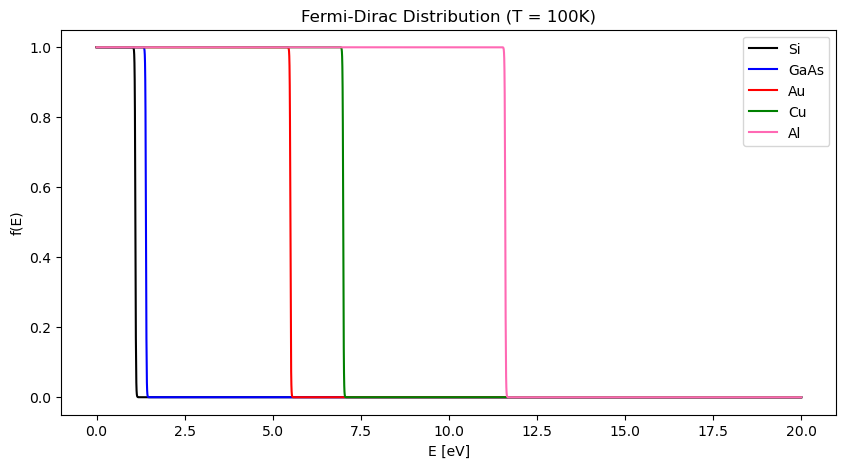

In [115]:
#PLotting

plt.figure(figsize=(10,5))

plt.title("Fermi-Dirac Distribution (T = 100K)")
plt.ylabel("f(E)")
plt.xlabel("E [eV]")

plt.plot(energy, distro_values["Si"], color = "black", linestyle = "-", label = "Si" )
plt.plot(energy, distro_values["GaAs"], color = "blue", linestyle = "-", label = "GaAs")
plt.plot(energy, distro_values["Au"], color = "red", linestyle = "-", label = "Au" )
plt.plot(energy, distro_values["Cu"], color = "green", linestyle = "-", label = "Cu" )
plt.plot(energy, distro_values["Al"], color = "hotpink", linestyle = "-", label = "Al" )

plt.legend()

plt.show()

(g) Repeat steps (d,e,f) for 3 more temperatures ($0\,\rm K$, $400\,\rm K$, and $1000\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. Each panel should show the results for each temperature ($0\,\rm K$, $100\,\rm K$, $400\,\rm K$, and $1000\,\rm K$).

/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/tmp/ipykernel_4282/3695983162.py:15: RuntimeWarning: overflow encountered in exp
  f = 1/(np.exp((Energy-E_f)/(k_b_new*temp))+1) #Fermi-dirac distribution to
/

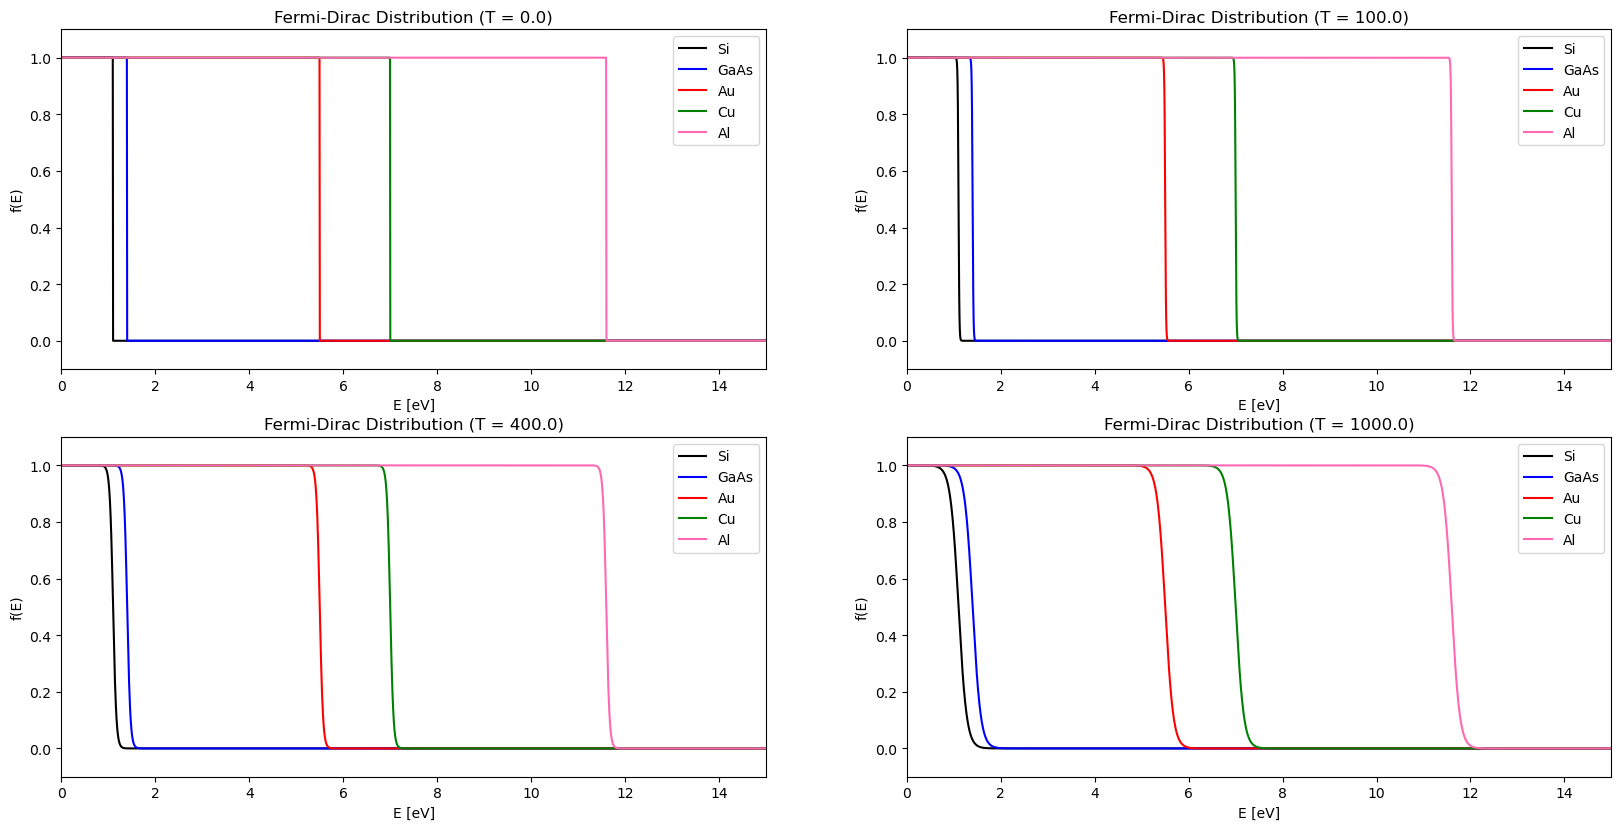

In [116]:
#Energy vector

energy = np.linspace(0., 20., 3000)

#Fixed temperatures array

temp_arr = [0., 100., 400., 1000.]

def make_subPlots_FD_distro(temp_arr):
    """
    Fuction to make a 4 panel plot of FD distribution using 4 different temperatures (for all 4 elements)
    Input:
        temp_arr: array of absolute temperature values (float/integer)
    Output:
        4 panel figure with all elements and temperatures
    Author: Alan Palma
    """
    #Figure enviroment
    plt.figure(figsize=(20,15))
    i = 1

    #For loop to evaluate all temperatures
    for temp in temp_arr:
        distro_values = get_set(energy, fermi_levels, temp)
        plt.subplot(3, 2, i)
        plt.title(f"Fermi-Dirac Distribution (T = {temp})")
        plt.ylabel("f(E)")
        plt.xlabel("E [eV]")
        plt.plot(energy, distro_values["Si"], color = "black", linestyle = "-", label = "Si" )
        plt.plot(energy, distro_values["GaAs"], color = "blue", linestyle = "-", label = "GaAs")
        plt.plot(energy, distro_values["Au"], color = "red", linestyle = "-", label = "Au" )
        plt.plot(energy, distro_values["Cu"], color = "green", linestyle = "-", label = "Cu" )
        plt.plot(energy, distro_values["Al"], color = "hotpink", linestyle = "-", label = "Al" )
            
        plt.legend()
        plt.xlim(0,15)
        plt.ylim(-0.1 ,1.1)
        i = i+1
    return plt.show() #Show the image

#Evaluate the function
make_subPlots_FD_distro(temp_arr)

### Analysis:

Based on your plots, answer the following questions:

(h) What happens with the energy distributions at low temperatures? Particularly, at $0\,\rm K$?

When the temperature decreases, the energy distribution becomes constant ('flat') until it reaches the Fermi level. The 'jump' between the highest occupied level and the lowest unoccupied level becomes short. When $T \to 0$, the F-D function becomes a step function at the Fermi level. This means that all the states below the Fermi energy are filled, and all the states above it are empty. 


(i) What happens with the fermion distributions in the materials when we increase the temperature? Why?

When the temperature T is increased, the F-D function becomes smooth, and it is possible to identify that there are now occupied states above the Fermi energy.

(j) Can we classify the materials in groups using their $f(E)$ distributions at a fixed temperature? Why do some materials have higher $E_{\rm F}$ than others?

In principle, it is possible to classify elements by their Fermi energy, since $E_f$ depends on the number of particles (fermions) filling the lower states and moving to higher states according to the Pauli exclusion principle.


### Problem 2 (Analysis of atmospheric $^{14}CO_2$, 10 points):

The value of $\Delta^{14}\text{CO}_2$ is defined as the relative difference in the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in a sample compared to a standard, corrected for isotopic fractionation and radioactive decay. It is expressed as:

$$
\Delta^{14}\text{CO}_2 = \left( \frac{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}}}{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}}} - 1 \right) \times 1000
$$

where:

-  $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}} $ is the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in the sample,

- $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}} $ is the ratio in a standard reference material.


The result is given in permil (‰).


### Data file:

Please download the data file from here:

https://github.com/wbandabarragan/physics-teaching-data/tree/main/1D-data/BHD_14CO2_datasets_20211013.csv


This data file has 60 years of $\Delta^{14}\text{CO}_2$ measurements from New Zealand. The measurements show the rise of the $^{14}\rm C$ due to the so-called **bomb spike** (from nuclear bomb testing), and the subsequent decline in $\Delta^{14}\text{CO}_2$ due to ban of nuclear bomb tests, the natural carbon cycle, and the increase of fosil fuel-based $\rm CO_2$ emissions. Scientists use this data to understand how quickly atmospheric $\rm CO_2$ flows in and out of the oceans and terrestrial ecosystems. We will solely use the first two columns of the file, following the header, i.e. the columns labeled as "Date" and "D14C_trend".

#### Reference:
https://doi.org/10.5194/acp-17-14771-2017

### Tasks:

(a) Inspect the structure of the data file. Then, create an appropriate IO python function that reads the filename, opens the data file using pandas, skips the header lines, place the first two columns ("Date" and "D14C_trend") into pandas objects, and returns them as numpy arrays.

(b) Call your IO function developed in (a) and obtain the time/date axis (in $[yr]$) and $\Delta^{14}\text{CO}_2$ (in ‰). Then, make a high-quality labeled plot of $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis).

(c) Is the relation between the two variables linear? Is it monotonic?

(d) Create a python function that identifies the year/date ($t_{\rm max}$) at which the bomb spike reached a maximum ($\Delta^{14}_{\rm max}\text{CO}_2$), and returns the peak coordinate pair: $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$.

(e) Propose a physically-motivated model for the data. Write down your proposed model in a markdown cell, and clearly indicate what the variables and free parameters are. Justify the number of free parameters that you have chosen. **Hint:** Since $\Delta^{14}\text{CO}_2$ involves radioactive decay, using a piece-wise function with exponentials ($\propto \exp{(\pm k\,t)}$ with $k$ being the growth/decay rate) may be a good choice. You should also use the peak coordinate pair $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$ computed in (d) to define your model and reduce the number of free parameters.

(f) Carry out a regression using python tools (e.g. scipy's **curve_fit** function). Report the best-fit function, and comment: what is the decay rate, $k_{\rm fit}$ of $\Delta^{14}\text{CO}_2$? **Hint:** Since the fitting function is not a simple polynomial function, in some implementations it may help to aid curve_fit by providing initial guesses for the free parameters in the regression (see: p0 argument).

(g) Report the result of your regression including the uncertainties associated with each free parameter in your model, and calculate the global uncertainty obtained via error propagation.

(h) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing both the empirical data and the best-fit model (obtained from your physically-motivated model, including the uncertainties). Does your model explain the empirical data?

### Analysis:

(i) Now, you will compare your findings with four semi-empirical decay rate predictions, taken from the litarature. Create a function that uses your model, but uses four predictions for the decay rate ($k_{\rm atm}$, $k_{\rm bio}$, $k_{\rm oce}$, and $k_{\rm sed}$) to return four semi-empirical $\Delta^{14}\text{CO}_2$ decay lines as arrays. Consider the following decay rates based on four contributing factors:

- **Atmospheric decay** due to the mixing and exchange of carbon dioxide in the atmosphere predicts $k_{\rm atm}=0.10\,\rm yr^{-1}$.

- **Biosphere decay** due to vegetation, soil, and organic matter predicts $k_{\rm bio}=0.02\,\rm yr^{-1}$.

- **Ocean decay** due to the long-term ocean absorption and storage of carbon predicts $k_{\rm oce}=0.01\,\rm yr^{-1}$.

- **Sedimentary decay** due to decomposition and mineralization predicts $k_{\rm sed}=0.001\,\rm yr^{-1}$.

(j) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing the empirical data, your best-fit model (obtained from your physically-motivated model, including the uncertainties), and four additional lines (one for every contributing factor above). Can we explain the observed decay of $\Delta^{14}\text{CO}_2$ as due to a single one of these contributing factors? If not, propose a possible decay model for $k_{\rm fit}$ based on all of them.

In [117]:
#Import third party libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import scipy.stats as st

(a) Inspect the structure of the data file. Then, create an appropriate IO python function that reads the filename, opens the data file using pandas, skips the header lines, place the first two columns ("Date" and "D14C_trend") into pandas objects, and returns them as numpy arrays.

In [118]:
#Create to fuction for a)

def read_data(path):

  """
  Function to extract two columns of a data file (.csv)
  Input: 
    path: directory in which is locted the data file (Sring)
  Outputs:
    date: data column corresponding to time axis [years] (np array, float)
    d14c_trend: data column corresponding to the 14^CO2 measurement (np.array, float)
    new_data_frame: pandas data frame that contains the two colums described above.
  Author: Alan Palma
  """
    
  data_frame = pd.read_csv(path, sep = ",") #Read de file from the path.
  data_frame = data_frame.loc[15:,:] #Avoid the first lines that we do not need.

  new_data_frame = pd.DataFrame({"Date": np.array(data_frame, dtype = float)[0:,0], #Covert the two first colums as a new pandas data frame
                    "d14c_trend": np.array(data_frame, dtype = float)[0:,1]})

  #Get both columns as numpy arrays 
  date = np.array(new_data_frame["Date"], dtype = float) 
  d14c_trend= np.array(new_data_frame["d14c_trend"], dtype = float)
  
  return date, d14c_trend, new_data_frame



(b) Call your IO function developed in (a) and obtain the time/date axis (in $[yr]$) and $\Delta^{14}\text{CO}_2$ (in ‰). Then, make a high-quality labeled plot of $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis).

In [119]:
#Define the path

path = "./data_quizes/BHD_14CO2_datasets_20211013.csv"

#Evaluate the fuction

date, d14c, new_data = read_data(path) 

print(d14c.shape)

(798,)


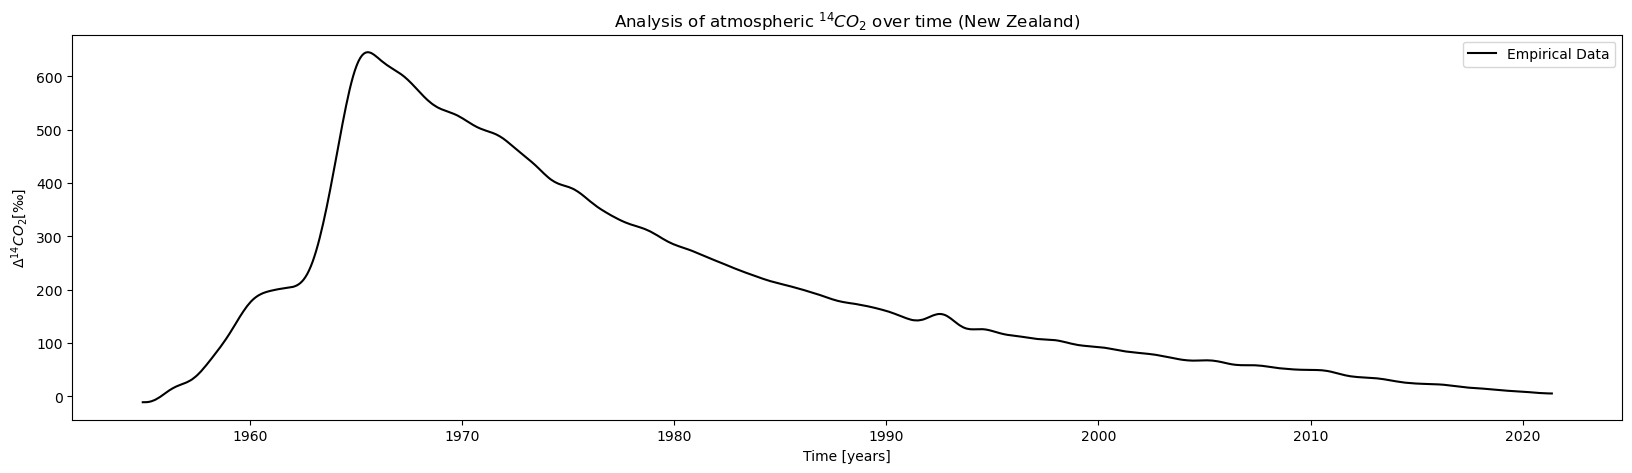

In [120]:
#Plotting

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "black", linestyle = "-", label = "Empirical Data")


plt.legend()

plt.show()

(c) Is the relation between the two variables linear? Is it monotonic?

In [121]:
# Spearman coefficient to evaluate monoticity

sp = st.spearmanr(date, d14c)
print(sp)

SignificanceResult(statistic=-0.6686656574660026, pvalue=1.5649782440069365e-104)


The relation between the two variables is not monotonic, since the Spearman coefficient is negative. It is also seen that the derivative sign will change after the peak so the relation is not monotonic.

(d) Create a python function that identifies the year/date ($t_{\rm max}$) at which the bomb spike reached a maximum ($\Delta^{14}_{\rm max}\text{CO}_2$), and returns the peak coordinate pair: $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$.

In [122]:
#Fuction to get the peak 

def find_peak(data):

    """
    Fuction to get the peak from a data frame with two variables. 
    Input:
        Data: pandas data frame with the two variables as columns (floats)
    Output:
        numpy array with the peak corrdinate pair (floats)
    Author: Alan Palma
    """

    max_index = data["d14c_trend"].idxmax() #Getting the highest value of dependent variable
    max_date = data["Date"].iloc[max_index]
    max_d14c = data["d14c_trend"].iloc[max_index] #Extract the peak coordinate using pandas tool
    
    return np.array([max_date, max_d14c])

In [123]:
#Evaluate the fuction to get the peak

max_cood = find_peak(new_data)

#Let's see the peak
print(max_cood)

[1965.5417  645.3   ]


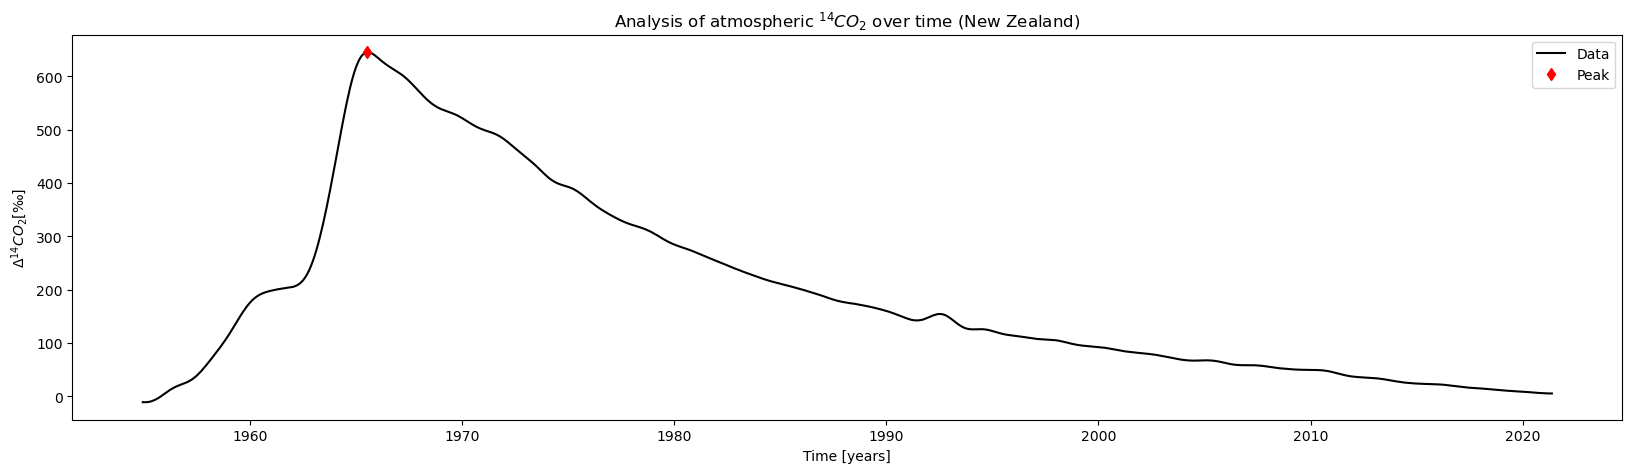

In [124]:
#Plotting to see the peak

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "black", linestyle = "-", label = "Data")
plt.plot(max_cood[0], max_cood[1], color = "red", linestyle = " ",marker = "d", label = "Peak") #Include the peak in the figure


plt.legend()

plt.show()

(e) Propose a physically-motivated model for the data. Write down your proposed model in a markdown cell, and clearly indicate what the variables and free parameters are. Justify the number of free parameters that you have chosen. **Hint:** Since $\Delta^{14}\text{CO}_2$ involves radioactive decay, using a piece-wise function with exponentials ($\propto \exp{(\pm k\,t)}$ with $k$ being the growth/decay rate) may be a good choice. You should also use the peak coordinate pair $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$ computed in (d) to define your model and reduce the number of free parameters.

The proposed model is a stepwise fuction defined as: 

$$ f(t)=
\begin{array}{cc}
  \{ & 
    \begin{array}{cc}
      A e^{+k_1t} & t\leq t_{peak} \\
      B e^{-k_2t} & t\geq t_{peak}
    \end{array}
\end{array}
$$

Where the Peak is $peak = (t_{peak}, \Delta_{peak})$

Now it is possible to evaluate this peak in the sptepwise function above:

$$
\Delta_{peak} = A e^{+k_1t_{peak}} \\
\Rightarrow A = \Delta_{peak} e^{-k_1t_{peak}}
$$

Similarly for the second piece of $f(t)$. 

$$
\Delta_{peak} = B e^{-k_2t_{peak}} \\
\Rightarrow B = \Delta_{peak} e^{k_2t_{peak}}
$$

Now, evaluating this result $f(t)$: 

$$ f(t)=
\begin{array}{cc}
  \{ & 
    \begin{array}{cc}
      \Delta_{peak} e^{-k_1t_{peak}} e^{+k_1t} & t\leq t_{peak} \\
      \Delta_{peak} e^{k_2t_{peak}} e^{-k_2t} & t\geq t_{peak}
    \end{array}
\end{array}
$$

, then

$$f(t)=
\begin{array}{cc}
  \{ & 
    \begin{array}{cc}
      \Delta_{peak} e^{k_1(t-t_{peak})} & t\leq t_{peak} \\
      \Delta_{peak} e^{-k_2(t-t_{peak})}& t\geq t_{peak}
    \end{array}
\end{array} 
$$




In [125]:


def model_d14(t, k1, k2):

    """
    Function with the model proposed above (stepwise function of expotentials)
    Inputs:
        t : independent variable [years], (array, float)
        k1: first free parameter corresponding to the increasing rate (float)
        k2: second free parameter corresponding to the decreasing rate (float)
    Output
        model : dependent variable, model evaluated with t wich computes the 14^CO2 measurement
    Author: Alan Palma
    """
    
    global max_cood

    t_peak = max_cood[0]
    delta_peak = max_cood[1]

    model = np.piecewise(t, [t <= t_peak, t >= t_peak],
                         [lambda t: delta_peak*np.exp(k1*(t-t_peak)), lambda t: delta_peak*np.exp(-k2*(t-t_peak))])


    return model

(f) Carry out a regression using python tools (e.g. scipy's **curve_fit** function). Report the best-fit function, and comment: what is the decay rate, $k_{\rm fit}$ of $\Delta^{14}\text{CO}_2$? **Hint:** Since the fitting function is not a simple polynomial function, in some implementations it may help to aid curve_fit by providing initial guesses for the free parameters in the regression (see: p0 argument).

In [126]:
#Make the curve fit

initial_guesses = [1.0e-2, 1.0e-2]

coef, cova = opt.curve_fit(model_d14, date, d14c, initial_guesses)

#Let's see the results
print(coef)

[0.29258631 0.05646834]


In [127]:
#Now, lest see if the resulting model is coherent

#Array (Time in years) to evaluate the model
years_new = np.linspace(date[0],date[-1], 4000)

x_peak = max_cood[0]

#Evaluate the model
d14c_new = model_d14(years_new, *coef)

#Export to make a proof
to_export = pd.DataFrame({"years": years_new,
                          "d14c": d14c_new})

to_export.to_csv("/home/alanp/Documents/Seventh_Semester/Computational_physics1/Quizes/data_quizes/data_export.csv", index = False)

print(d14c_new)

[29.17048535 29.31258047 29.45536776 ... 27.62655613 27.60065886
 27.57478586]


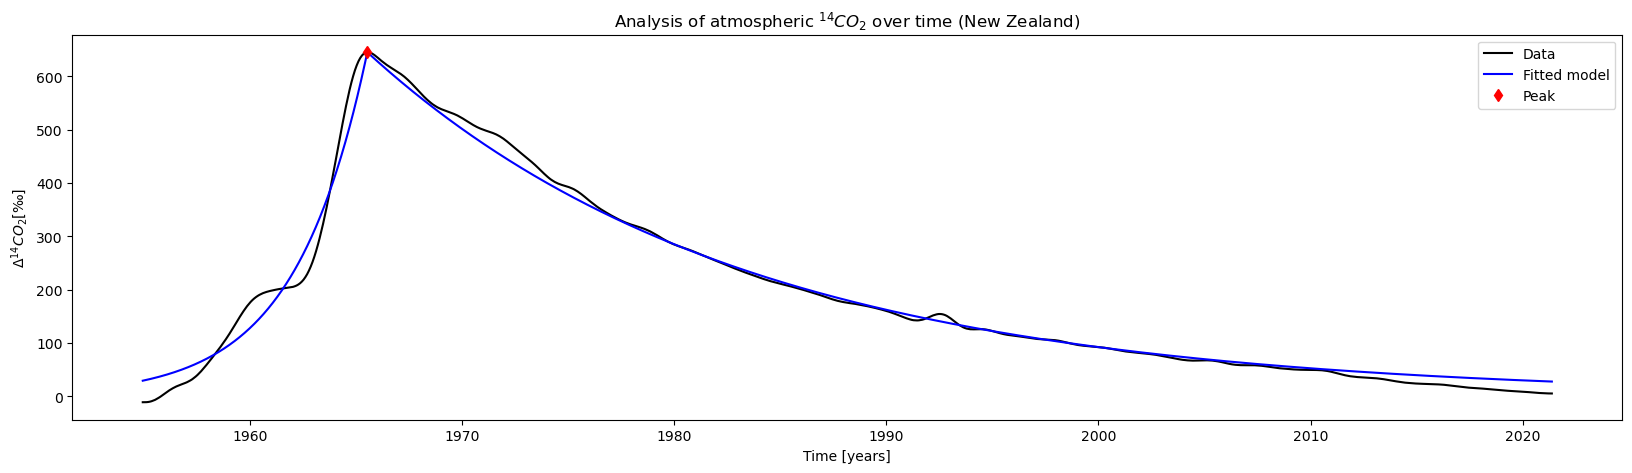

In [128]:
#Plotting

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "black", linestyle = "-", label = "Data")
plt.plot(years_new, d14c_new, color = "blue", linestyle = "-", label = "Fitted model") #Include model to the figure
plt.plot(x_peak, max_cood[1], color = "red", linestyle = " ",marker = "d", label = "Peak")

plt.legend()

plt.legend()

plt.show()

In [129]:
#Report the value of the decay rate (k2)

k1 = coef[0]
k2 = coef[1]

print(f"The decay rate value (k2) is: {'%.5F' % k2} [1/years]")

The decay rate value (k2) is: 0.05647 [1/years]


(g) Report the result of your regression including the uncertainties associated with each free parameter in your model, and calculate the global uncertainty obtained via error propagation.

In [130]:
#Uncertanties obtained in teh regresion (covariant matrix)
 
var_k1 = np.sqrt(np.diag(cova))[0]
var_k2 = np.sqrt(np.diag(cova))[1]

#Report the results for k1 (increasing rate) and k2 (decreasing rate)

print(f"k1 = {'%.5f' % k1} +/- {'%.7f' % var_k1} [1/years]")
print(f"K2 = {'%.5f' % k2} +/- {'%.7f' %var_k2} [1/years]")


k1 = 0.29259 +/- 0.0025747 [1/years]
K2 = 0.05647 +/- 0.0002179 [1/years]


To get the uncertainties by propagation of erros, it is derived the equation f, then:

$$
\begin{aligned}
& \frac{\partial f}{\partial k}= \begin{cases}\Delta_{\text {peak }}\left(t-t_{\text {peak }}\right) e^{k_1(t-t_{\text {peak }})}, & t \leq t_{\text {peak }} \\
-\Delta_{\text {peak }}\left(t-t_{\text {peak }}\right) e^{-k_2\left(t-t_{\text {peak }}\right)}, & t \leq t_{\text {peak }}\end{cases} \\
& \Delta f \approx f(t) \begin{cases}f\left(t-t_{\text {peak }}\right) \Delta k_1, & t \leq t_{\text {pear }} \\
-\left(t-t_{\text {peak }}\right) \Delta k_2 & t \geq t_{\text {peak }}\end{cases}
\end{aligned}
$$
The uncertainties are given by:
$$
\begin{aligned}
\sigma_f= f(t) \begin{cases}\left(t-t_{\text {peak }}\right) \sigma_{k_1}, & t \leq t_{\text {peak }} \\
-(t-t_{peak}) \sigma_{k_2}, & t \geq t_{peak}\end{cases}
\end{aligned}
$$


In [135]:
def model_d14_uncertanties(t, k1, k2, unc_k1, unc_k2):

    """
    Function to compute the uncertainty of the model proposed
    Inputs: 
        t: time [year], (array, float)
        k1: first free parameter corresponding to the increasing rate [1/year], (float)
        k2: second free parameter corresponding to the decreasing rate [1/year], (float)
        unc_k1: uncertainty related to k1 free parameter, (float)
        unc_k2: uncertainty related to k1 free parameter, (float)
    Output: 
        model_unc : global uncertainty using propagation of errors
        
    """
    
    global max_cood #Define the x-component as global to use it as a condition

    t_peak = max_cood[0]

    #Proposed model
    model_unc = np.piecewise(t, [t <= t_peak, t >= t_peak],
                         [lambda t: np.abs(model_d14(t, k1, k2))*np.abs(unc_k1*(t-t_peak)), lambda t: np.abs(model_d14(t, k1, k2))*np.abs(unc_k2*-(t-t_peak))])


    return model_unc

In [136]:
#Evaluate the function to get the global uncertainty

f_unc = model_d14_uncertanties(years_new, *coef, var_k1, var_k2)

In [137]:
#Report the model with the associated uncertainty

f_report_plus = np.array(d14c_new + f_unc) #+1 sigma
f_report_menos = np.array(d14c_new - f_unc) #-1 sigma

(h) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing both the empirical data and the best-fit model (obtained from your physically-motivated model, including the uncertainties). Does your model explain the empirical data?

Yes, the proposed model explains the empirical data and provides a rate of decay for atmospheric $^{14}CO_2$. However, it is later analyzed that this is a global decay rate, which could be an overall contribution from other sources.

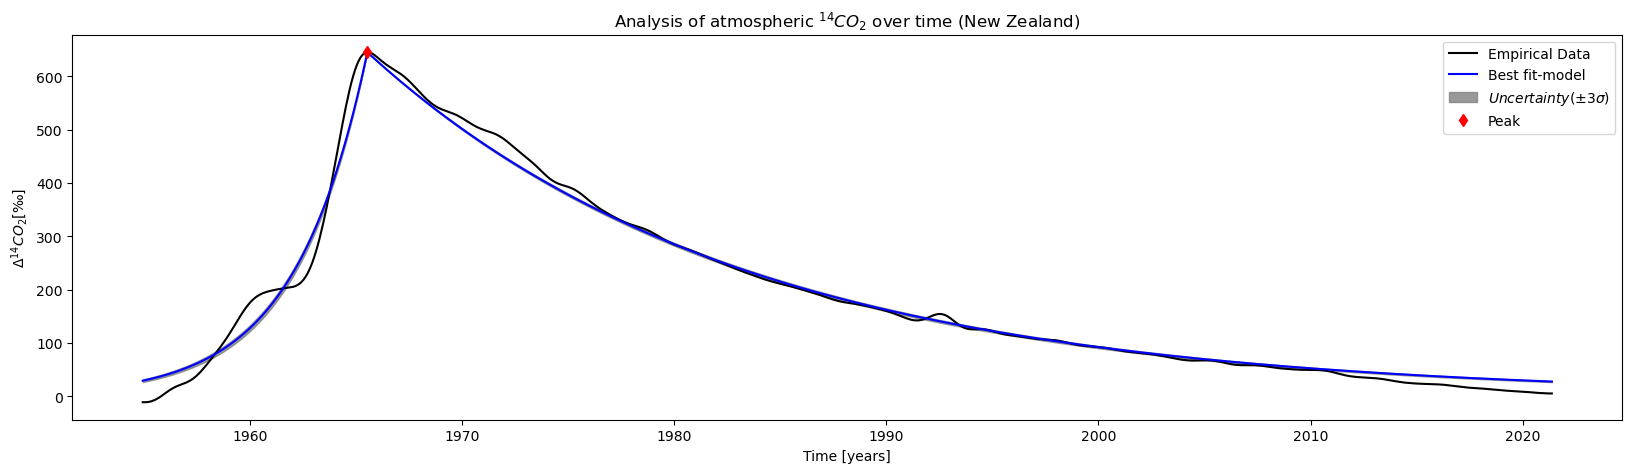

In [134]:
#Plotting the uncertainties

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "black", linestyle = "-", label = "Empirical Data")
plt.plot(years_new, d14c_new, color = "blue", linestyle = "-", label = "Best fit-model")
#Incude the global uncertainty to the figure (it was used +/-3 sigma to appreciate better the uncertainty)
plt.fill_between(years_new, d14c_new - 3*f_unc, d14c_new + 3*f_unc, color = "gray", alpha = 0.8, label = r"$Uncertainty (\pm 3\sigma)$") 

plt.plot(x_peak, max_cood[1], color = "red", linestyle = " ",marker = "d", label = "Peak")

plt.legend()

plt.legend()

plt.show()

### Analysis:

(i) Now, you will compare your findings with four semi-empirical decay rate predictions, taken from the litarature. Create a function that uses your model, but uses four predictions for the decay rate ($k_{\rm atm}$, $k_{\rm bio}$, $k_{\rm oce}$, and $k_{\rm sed}$) to return four semi-empirical $\Delta^{14}\text{CO}_2$ decay lines as arrays. Consider the following decay rates based on four contributing factors:

- **Atmospheric decay** due to the mixing and exchange of carbon dioxide in the atmosphere predicts $k_{\rm atm}=0.10\,\rm yr^{-1}$.

- **Biosphere decay** due to vegetation, soil, and organic matter predicts $k_{\rm bio}=0.02\,\rm yr^{-1}$.

- **Ocean decay** due to the long-term ocean absorption and storage of carbon predicts $k_{\rm oce}=0.01\,\rm yr^{-1}$.

- **Sedimentary decay** due to decomposition and mineralization predicts $k_{\rm sed}=0.001\,\rm yr^{-1}$.

In [138]:
#Builting the fuction

def model_predic(time, k1, predictions_data):
    """
    Fuction to evaluate other decay rates in the model proposed
    Inputs:
        time: dependent variable [year], (float, integers)
        k1: first free parameter corresponding to the increasing rate [1/year], (float)
        perdictions_data: pandas data frame with the predictions of the decay rate [1/year], (float)
    Outputs:
        data_katm: numpy array with the values of the model evaluated with k_atm in k2, (float)
        data_bio: numpy array with the values of the model evaluated with k_bio in k2, (float)
        data_oce: numpy array with the values of the model evaluated with k_oce in k2, (float)
        data_sed: numpy array with the values of the model evaluated with k_sed in k2, (float)
    Athor: Alan Palma
    """
    #Get the prediction vlaues and their names to use it in a for loop
    predictions = np.array(predictions_data["k_value"], dtype = float)
    names_arr = np.array(predictions_data["names"], dtype = str)

    data_evaluated_k = pd.DataFrame({}) #Empty data frame to save the evaluated model

    #for loop to evaluate each decay rate from predictions_data
    for i in range(len(predictions)):
        f_k2 = model_d14(time, k1, predictions[i])
        data_evaluated_k[names_arr[i]] = np.array(f_k2, dtype = float)

    #Get all the arrays separated

    data_katm = data_evaluated_k[names_arr[0]]
    data_bio = data_evaluated_k[names_arr[1]]
    data_oce = data_evaluated_k[names_arr[2]]
    data_sed = data_evaluated_k[names_arr[3]]

    return data_katm, data_bio, data_oce, data_sed

In [139]:
#Evaluate 

#Create a pandas data frame for all k's proposed:
ks_array = pd.DataFrame({"names": ["k_atm", "k_bio", "k_oce", "k_sed"],
                         "k_value": [0.10, 0.02, 0.01, 0.001]})

#Evaluate the function to get the model evaluated

data_katm, data_bio, data_oce, data_sed = model_predic(years_new, k1, ks_array)

#print(data_predictions)

(j) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing the empirical data, your best-fit model (obtained from your physically-motivated model, including the uncertainties), and four additional lines (one for every contributing factor above). Can we explain the observed decay of $\Delta^{14}\text{CO}_2$ as due to a single one of these contributing factors? If not, propose a possible decay model for $k_{\rm fit}$ based on all of them.

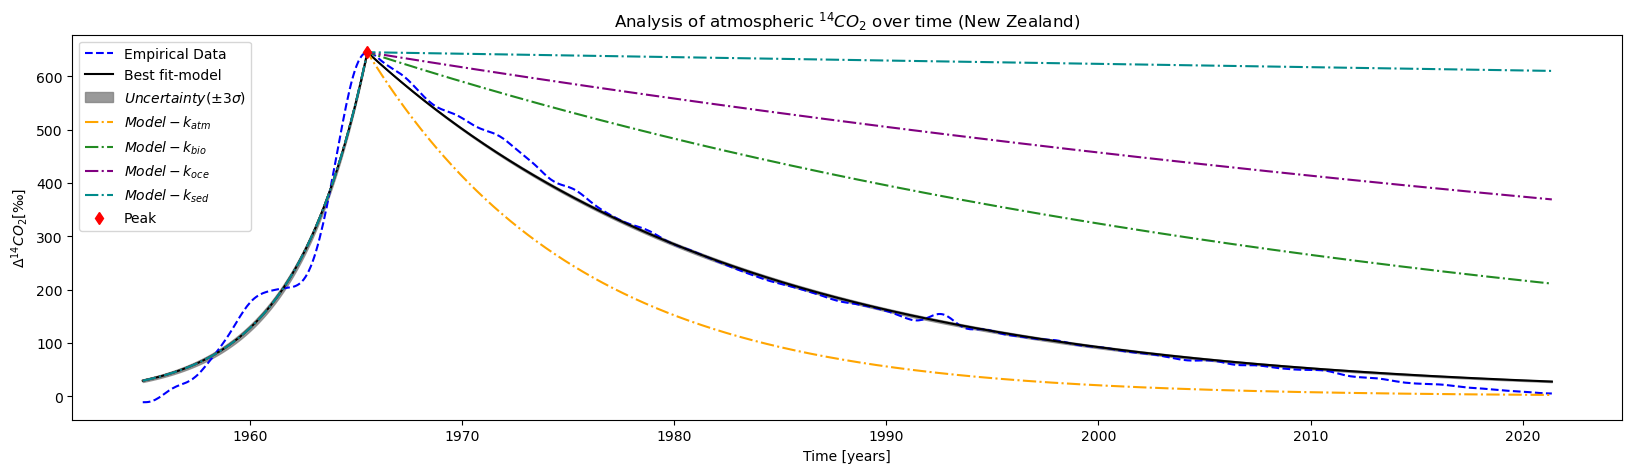

In [140]:
#Plotting all together

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "blue", linestyle = "--", label = "Empirical Data")
plt.plot(years_new, d14c_new, color = "black", linestyle = "-", label = "Best fit-model")
plt.fill_between(years_new, d14c_new - 3*f_unc, d14c_new + 3*f_unc, color = "gray", alpha = 0.8, label = r"$Uncertainty (\pm 3\sigma)$")
#Include the fit-model evaluted for each decay constants predicted
plt.plot(years_new, data_katm, color = "orange", linestyle = "-.", label = r"$Model-k_{atm}$")
plt.plot(years_new, data_bio, color = "forestgreen", linestyle = "-.", label = r"$Model-k_{bio}$")
plt.plot(years_new, data_oce, color = "purple", linestyle = "-.", label = r"$Model-k_{oce}$")
plt.plot(years_new, data_sed, color = "darkcyan", linestyle = "-.", label = r"$Model-k_{sed}$")


plt.plot(x_peak, max_cood[1], color = "red", linestyle = " ",marker = "d", label = "Peak")

plt.legend()

plt.legend()

plt.show()

A single one of this contributions can not explain the decay rate of the model, so that, it is possible to propose a model where the decay rate $k_2$ is a linear combination of the contributions ($k_{atm}, k_{bio}, k_{oce}, k_{sed}$):

$$ k_2 = C_1*k_{atm}+C_2*k_{bio}+C_3*k_{oce}+C_4*k_{sed}$$

,where $C_1, C_2, C_3$, and $C_4$ are constants, and the sum should be 1, in order to each one of k values contribute a percentaje of the value.

In this way we have a system of two equation with four variables:

$$
\begin{aligned}
\begin{cases} k_2 = C_1*k_{atm}+C_2*k_{bio}+C_3*k_{oce}+C_4*k_{sed} \\
\sum_{i=1}^{4}C_i=1\end{cases}
\end{aligned}
$$

, then

$$
\begin{aligned}
\begin{cases} k_2 - C_1*k_{atm} - C_2*k_{bio} = C_3*k_{oce}+C_4*k_{sed} \\
1-C_1-C_2 = C_3+C_4\end{cases}
\end{aligned}
$$



In [141]:
#Import third party libraries

import numpy.linalg as la

In [46]:
#First, let's fix two constants

C1 = 0.5
C2 = 0.3

In [142]:
#Built a function to get the constants C1, c2, C3, and C4

def get_constats(k2, k_data, c1, c2 ):

    """
    Function that solves a linear system of two equations to get constants c1 and c2.
    Inputs: 
        k2: Decay constant obtained from the data fit (second free parameter), (float)
        k_data: pandas data frame with the value k values of contrubutions [1/year], (floats)
        c1: First constant already fixed (float)
        c2: Second constant already fixed (float)
    Output: Numpy array with all 4 constants [c1, c2, c3, c4], (floats)

    """

    kvalues = k_data["k_value"]
    
    matrix = np.array([[kvalues[2], kvalues[3]], 
                       [1, 1]])
    
    b = np.array([[k2 - c1*kvalues[0]-c2*kvalues[1]],
                  [1-c1-c2]])
    
    sol = la.inv(matrix).dot(b)

    sol_arr = np.array([c1, c2, sol[0][0], sol[1][0]])

    return sol_arr

    

In [143]:
#Evaluate the function

constants_arr = get_constats(k2, ks_array, C1, C2)

#Lest check 

#print(constants_arr, "\n", np.sum(constants_arr))


In [144]:
#Resport the result

print(f"k2 = {constants_arr[0]}*k_atm + {constants_arr[1]}*k_bio + {"%.3f" % constants_arr[2]}*k_oce + {"%.3f" % constants_arr[3]}*k_sed")

k2 = 0.5*k_atm + 0.3*k_bio + 0.030*k_oce + 0.170*k_sed


In [145]:
#Calculate k2 from contributions

k_values = ks_array["k_value"]

k2_cont = k_values.dot(constants_arr)

#Evaluate the fuction with the new k2

d14c_from_contributions = model_d14(years_new, k1, k2_cont)

print(d14c_from_contributions.shape, "\n", k2_cont, "\n", k2_cont-k2)

(4000,) 
 0.05646833565998717 
 0.0


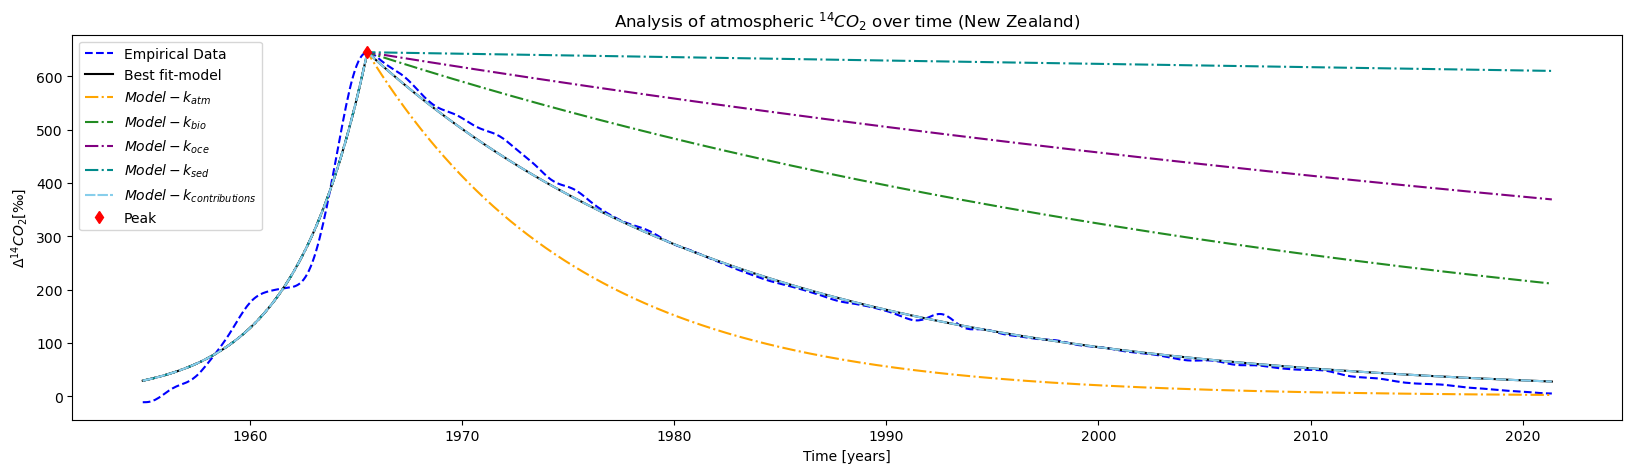

In [146]:
#Plotting again including k2 from contribution

plt.figure(figsize=(20,5))

plt.title(r"Analysis of atmospheric $^{14}CO_2$ over time (New Zealand)")
plt.ylabel(r"$\Delta^{14} CO_2 [‰]$")
plt.xlabel("Time [years]")

plt.plot(date, d14c, color = "blue", linestyle = "--", label = "Empirical Data")
plt.plot(years_new, d14c_new, color = "black", linestyle = "-", label = "Best fit-model")
# plt.fill_between(years_new, d14c_new - 3*f_unc, d14c_new + 3*f_unc, color = "gray", alpha = 0.8, label = r"$Uncertainty \; (\pm 3\sigma)$")
#Include the fit-model evaluted for each decay constants predicted
plt.plot(years_new, data_katm, color = "orange", linestyle = "-.", label = r"$Model-k_{atm}$")
plt.plot(years_new, data_bio, color = "forestgreen", linestyle = "-.", label = r"$Model-k_{bio}$")
plt.plot(years_new, data_oce, color = "purple", linestyle = "-.", label = r"$Model-k_{oce}$")
plt.plot(years_new, data_sed, color = "darkcyan", linestyle = "-.", label = r"$Model-k_{sed}$")

#Include the model evaluated with new k2 from contributions 
plt.plot(years_new, d14c_from_contributions, color = "skyblue", linestyle = (0, (5, 1)), label = r"$Model-k_{contributions}$")

#PLot the peak
plt.plot(x_peak, max_cood[1], color = "red", linestyle = " ",marker = "d", label = "Peak")

plt.legend()

plt.legend()

plt.show()